### CS4102 - Geometric Foundations of Data Analysis I
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 1. Least Squares Fitting

# Week 2: More Least Squares Fitting

## Questions

1. Python - how?
2. Data - how does it get into a python session
3. Visualization - packages?
4. How to multiply (transpose, invert) matrices in python?

* ipython

* http://www.python.org

* jupyter notebook

* https://www.anaconda.com/products/individual-d


## 2. Data

* csv

* https://docs.python.org/3/library/csv.html

In [4]:
import csv

The **magic** command `%cat` allows us to list the contents of a (text) file.

In [5]:
%cat production.csv

i,x,y
1,30,73
2,20,50
3,60,128
4,80,170
5,40,87
6,50,108
7,60,135
8,30,69
9,70,148
10,60,132


We use a `DictReader` from the `csv` library to read the data into a list of Python dictionaries.

In [6]:
with open('production.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = [row for row in reader]
    
rows

[{'i': '1', 'x': '30', 'y': '73'},
 {'i': '2', 'x': '20', 'y': '50'},
 {'i': '3', 'x': '60', 'y': '128'},
 {'i': '4', 'x': '80', 'y': '170'},
 {'i': '5', 'x': '40', 'y': '87'},
 {'i': '6', 'x': '50', 'y': '108'},
 {'i': '7', 'x': '60', 'y': '135'},
 {'i': '8', 'x': '30', 'y': '69'},
 {'i': '9', 'x': '70', 'y': '148'},
 {'i': '10', 'x': '60', 'y': '132'}]

In [7]:
xxx = [int(row['x']) for row in rows]
xxx

[30, 20, 60, 80, 40, 50, 60, 30, 70, 60]

In [8]:
yyy = [int(row['y']) for row in rows]
yyy

[73, 50, 128, 170, 87, 108, 135, 69, 148, 132]

## 3. Plotting

* matplotlib

In [9]:
import matplotlib.pyplot as plt

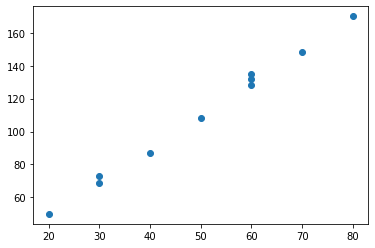

In [10]:
plt.plot(xxx, yyy, 'o')

* How to add the straight line?

### 3DPlotting

In [12]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


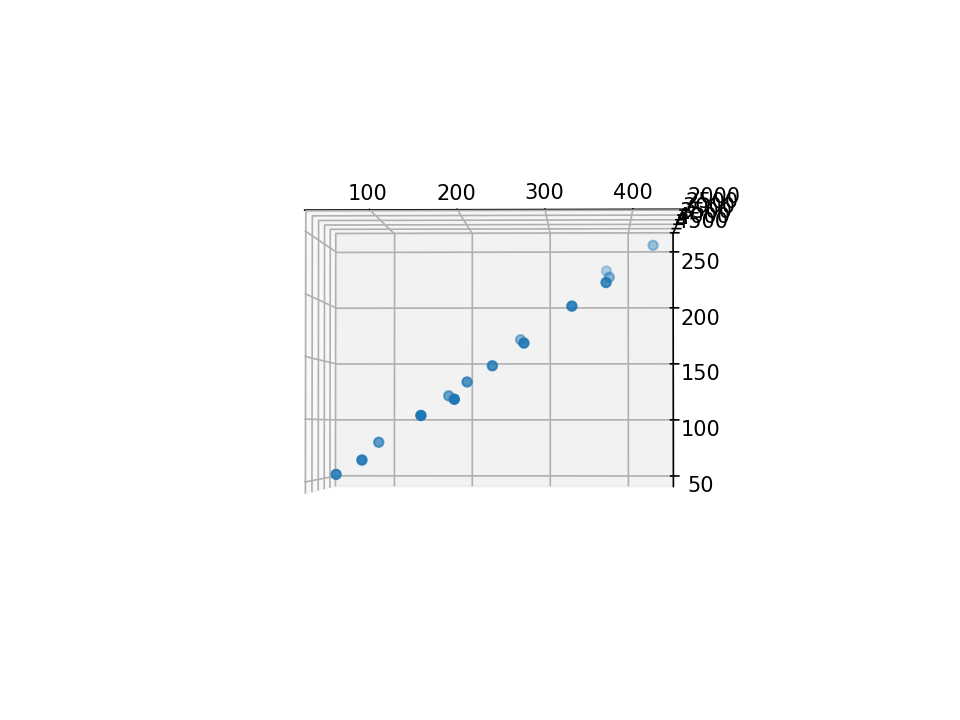

In [13]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection="3d")

In [14]:
%cat cream.csv

i,y,xone,xtwo
1,162,274,2450
2,120,180,3254
3,223,375,3802
4,131,205,2838
5,67,86,2347
6,169,265,3782
7,81,98,3008
8,192,330,2450
9,116,195,2137
10,55,53,2560
11,252,430,4020
12,232,372,4427
13,144,236,2666
14,103,157,2088
15,212,370,2605


In [15]:
with open('cream.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = [row for row in reader]

rows[0]

{'i': '1', 'y': '162', 'xone': '274', 'xtwo': '2450'}

In [16]:
yy = [int(row['y']) for row in rows]
xx1 = [int(row['xone']) for row in rows]
xx2 = [int(row['xtwo']) for row in rows]

In [18]:
ax.scatter(xx1, xx2, yy)

## 4. Matrix Algebra

In [19]:
sum(xxx)

500

In [20]:
sum(yyy)

1100

In [21]:
sum(x**2 for x in xxx)

28400

In [23]:
sum(xxx[i] * yyy[i] for i in range(len(xxx)))  # :-(

61800

In [24]:
sum (x * yyy[i] for i, x in enumerate(xxx))

61800

In [25]:
sum(x * y for x, y in zip(xxx,yyy))

61800

In [26]:
import numpy as np

In [28]:
xxx = np.array(xxx)
xxx

array([30, 20, 60, 80, 40, 50, 60, 30, 70, 60])

In [29]:
yyy = np.array(yyy)
yyy

array([ 73,  50, 128, 170,  87, 108, 135,  69, 148, 132])

In [30]:
xxx * yyy # this is not the dot product :-(

array([ 2190,  1000,  7680, 13600,  3480,  5400,  8100,  2070, 10360,
        7920])

In [32]:
np.dot(xxx, yyy)  # but this is!

61800

In [33]:
xxx.dot(yyy) # and this!

61800

In [34]:
xxx.reshape(1,10)

array([[30, 20, 60, 80, 40, 50, 60, 30, 70, 60]])

In [35]:
yyy.reshape(10,1)

array([[ 73],
       [ 50],
       [128],
       [170],
       [ 87],
       [108],
       [135],
       [ 69],
       [148],
       [132]])

In [36]:
np.matmul(xxx.reshape(1,10),yyy.reshape(10,1))

array([[61800]])

Now for the formula: $B = (X^t X)^{-1} (X^t Y)$

In [37]:
X = np.array([(1,x) for x in xxx])
X

array([[ 1, 30],
       [ 1, 20],
       [ 1, 60],
       [ 1, 80],
       [ 1, 40],
       [ 1, 50],
       [ 1, 60],
       [ 1, 30],
       [ 1, 70],
       [ 1, 60]])

In [38]:
Y = np.array([yyy]).T
Y

array([[ 73],
       [ 50],
       [128],
       [170],
       [ 87],
       [108],
       [135],
       [ 69],
       [148],
       [132]])

In [39]:
XtX = np.matmul(X.T, X)
XtX

array([[   10,   500],
       [  500, 28400]])

In [40]:
XtY = np.matmul(X.T, Y)
XtY

array([[ 1100],
       [61800]])

In [41]:
inv = np.linalg.inv(XtX)

In [42]:
inv

array([[ 8.35294118e-01, -1.47058824e-02],
       [-1.47058824e-02,  2.94117647e-04]])

In [43]:
inv @ (X.T @ Y) # matrix multiplication

array([[10.],
       [ 2.]])